# Titanic: Machine Learning from Disaster w/ Amazon SageMaker

Based on https://github.com/minsuk-heo/kaggle-titanic


### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

# Recap: ML process
![ml_process](./images/ml_process.png)

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [122]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### load train, test dataset using Pandas

In [123]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/sidkwon/kaggle-titanic/master/input/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sidkwon/kaggle-titanic/master/input/test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [124]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [125]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
train.shape

(891, 12)

In [127]:
test.shape

(418, 11)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that **Age** value is missing for many rows. 

Out of 891 rows, the **Age** value is present only in 714 rows.

Similarly, **Cabin** values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [130]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [131]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [133]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

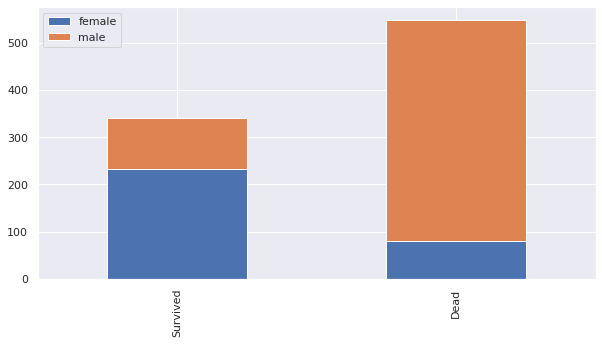

In [134]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

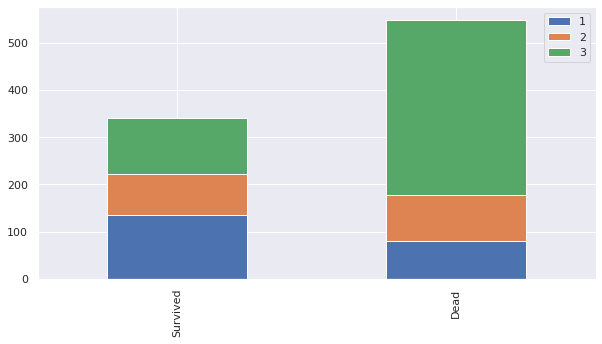

In [135]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

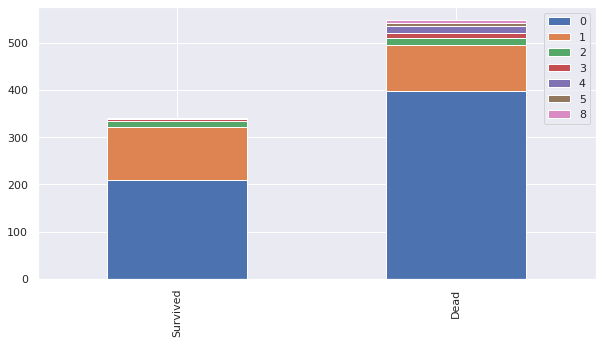

In [136]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms **a person aboarded without siblings or spouse** more likely dead

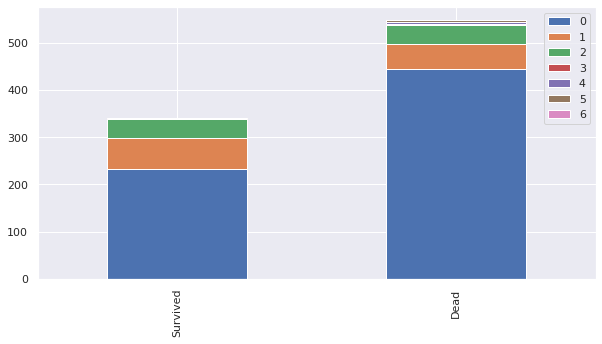

In [137]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms **a person aboarded alone** more likely dead

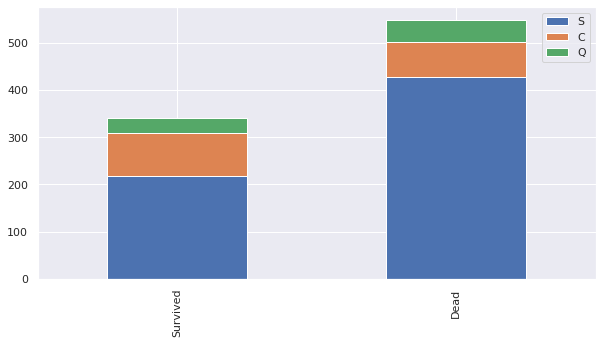

In [138]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, **Pclass** is key feature for classifier

In [140]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [141]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.2 Name

'Name' 컬럼에서 영어 호칭을 추출하기 위해 pandas의 str.extract() 메소드를 사용한다.  
- str.extract(): https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html  
- RegExr: https://regexr.com/

In [142]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # expand=True; return dataframe, expand=False; return series

In [143]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Ms            1
Mme           1
Countess      1
Don           1
Capt          1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [144]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3  

pandas.Series.map: https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

In [145]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [146]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [147]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


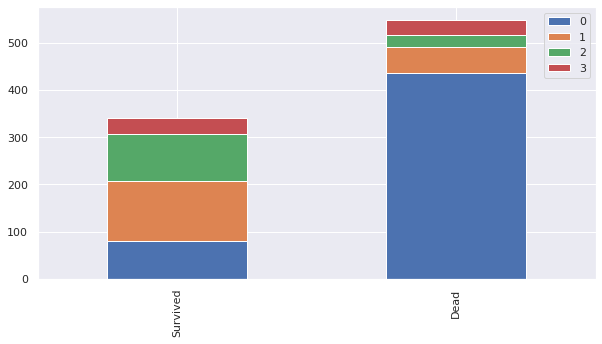

In [148]:
bar_chart('Title')

In [149]:
# delete unnecessary feature from dataset
# pandas.DataFrame.drop: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [150]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [151]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.3 Sex

male: 0
female: 1

In [152]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

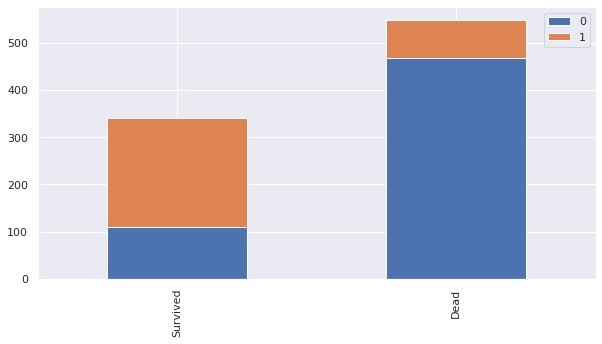

In [153]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [154]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


In [155]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

### pandas.DataFrame.groupby
![](./images/pandas_groupby.jpeg)

In [156]:
df_temp = train.groupby("Title")

In [157]:
df_temp.size()

Title
0    517
1    182
2    125
3     67
dtype: int64

In [158]:
df_temp.sum()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Title,,,,,,,,
0,234976,81,1246,0,16452.50,149,79,12636.2865
1,74417,127,420,182,3935.00,130,100,7971.2128
2,56645,99,250,125,4472.00,87,104,5642.3166
3,31348,35,141,7,1311.67,100,57,2444.1334


In [159]:
df_temp.mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Title,,,,,,,,
0,454.499033,0.156673,2.410058,0.000000,31.823017,0.288201,0.152805,24.441560
1,408.884615,0.697802,2.307692,1.000000,21.620879,0.714286,0.549451,43.797873
2,453.160000,0.792000,2.000000,1.000000,35.776000,0.696000,0.832000,45.138533
3,467.880597,0.522388,2.104478,0.104478,19.577164,1.492537,0.850746,36.479603


In [160]:
df_temp.median()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Title,,,,,,,,
0,466.0,0.0,3.0,0.0,30.0,0.0,0.0,9.35000
1,381.5,1.0,3.0,1.0,21.0,0.0,0.0,15.62085
2,438.0,1.0,2.0,1.0,35.0,1.0,0.0,26.00000
3,450.0,1.0,2.0,0.0,9.0,1.0,1.0,29.12500


transform: 데이터프레임에 그룹 단위로 통계량을 집계해서 칼럼 추가  
df.groupby(['group']).col.transform('count')

![](./images/pandas_groupby_transform.jpeg)

In [161]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

**seaborn.FacetGrid**  
Multi-plot grid for plotting conditional relationships.  
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

**seaborn.kdeplot**
Plot univariate or bivariate distributions using kernel density estimation.  
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

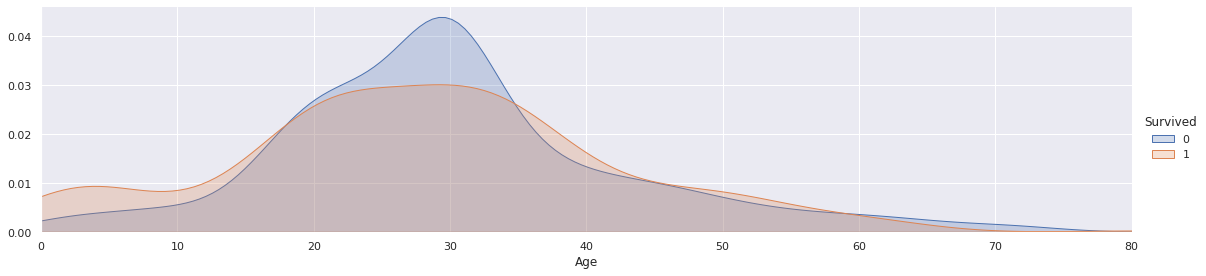

In [162]:
# hue: train dataframe을 "Survived" 컬럼 기준으로 나눈다
# height: 각 facet의 height(in inches)
# aspect: 각 facet의 화면비율, aspect=4는 4:1을 의미
facet = sns.FacetGrid(train, hue="Survived", height=4, aspect=4)

# facet.map: Facet grid에 kdeplot을 그린다 (Parameter: 사용할 그래프 이름, 시각화를 진행할 dataframe의 컬럼명, 채우기(fill)여부 )
facet.map(sns.kdeplot,'Age',shade=True)

facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

(0.0, 20.0)

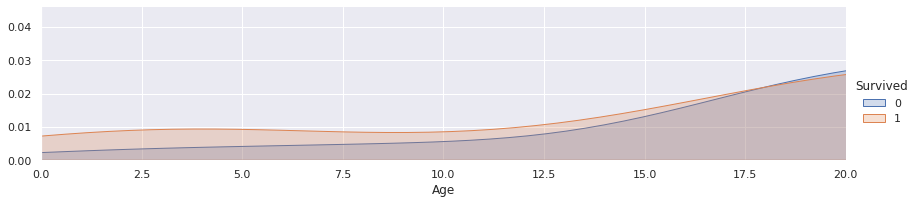

In [163]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

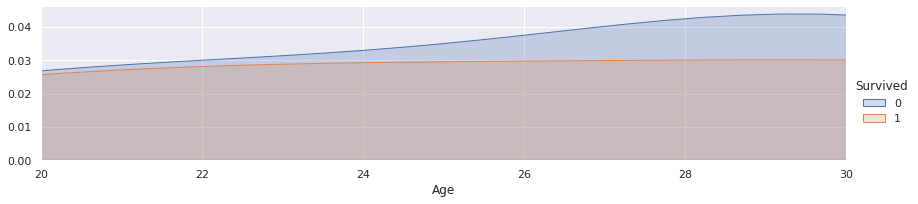

In [164]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

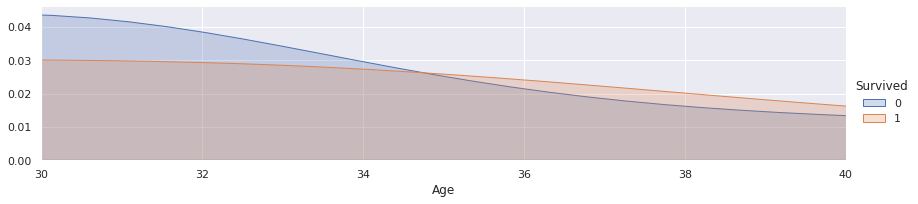

In [165]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

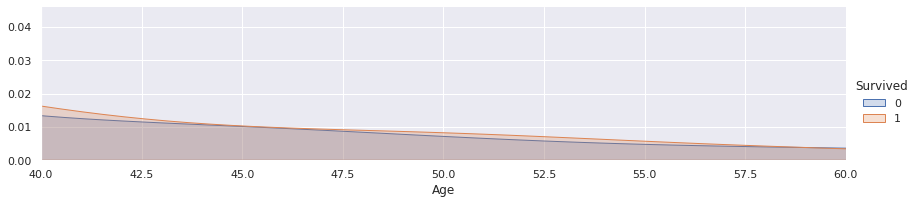

In [166]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(40.0, 60.0)

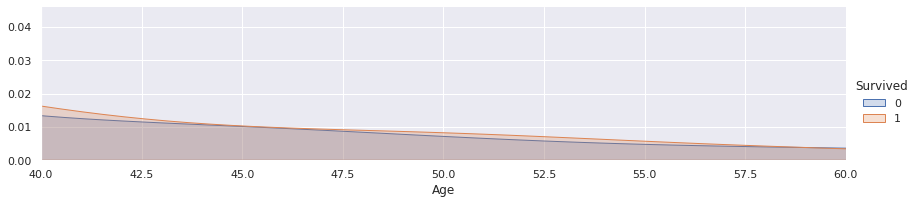

In [167]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

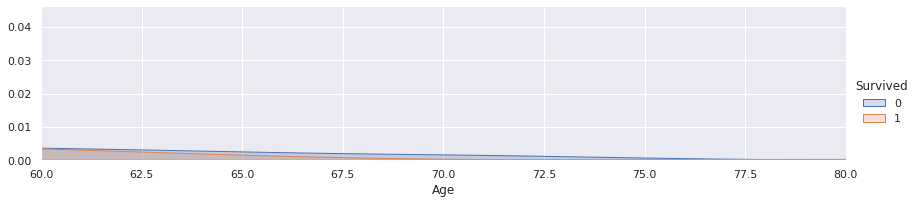

In [168]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

![pandas_selection](./images/pandas_selection.png)

In [171]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [172]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [173]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


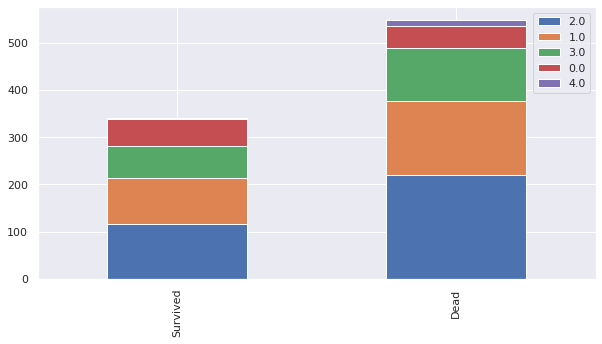

In [174]:
bar_chart('Age')

### 4.5 Embarked

#### 4.5.1 filling missing values

<AxesSubplot:>

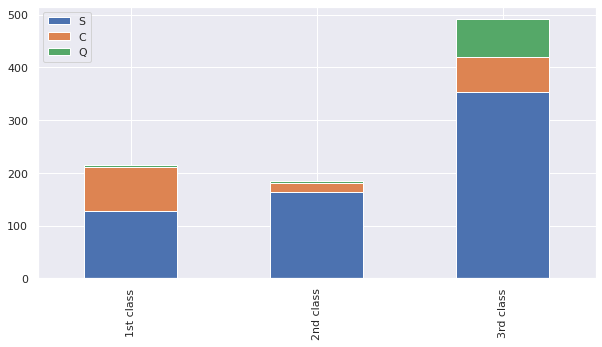

In [175]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [176]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [177]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [178]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

In [179]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


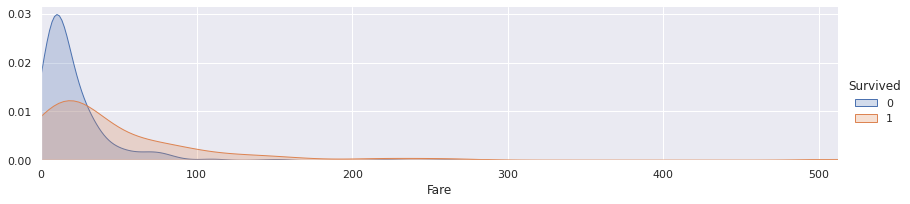

In [180]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

(0.0, 20.0)

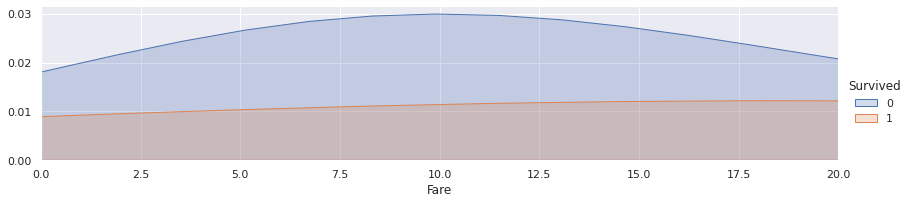

In [181]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

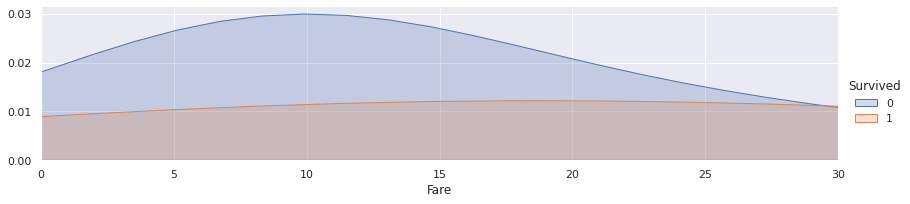

In [182]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0.0, 512.3292)

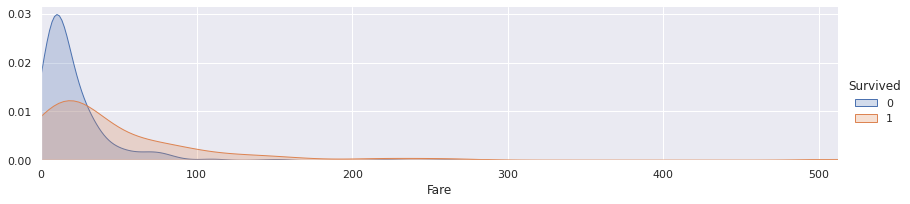

In [183]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [184]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [185]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 4.7 Cabin

In [186]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
D              3
E101           3
              ..
C45            1
D19            1
C50            1
E38            1
C101           1
Name: Cabin, Length: 147, dtype: int64

In [187]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

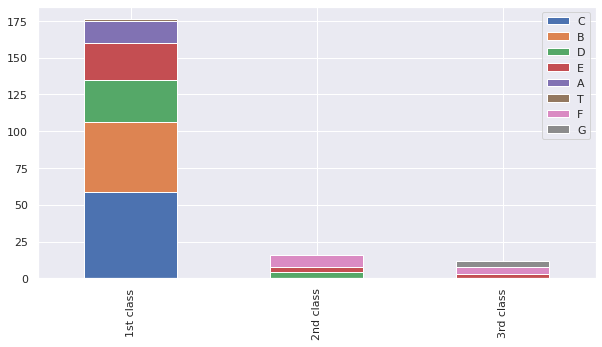

In [188]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']

df.plot(kind='bar',stacked=True, figsize=(10,5))

In [189]:
# Feature scaling을 위해 작은 숫자를 사용
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [190]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [191]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

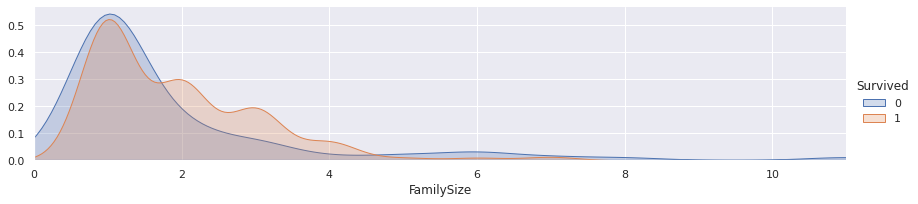

In [192]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [193]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [194]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [195]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [196]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [197]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [198]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## 최종 Dataframe 저장

In [199]:
train.to_pickle("train.pkl")
train_data.to_pickle("train_data.pkl")
target.to_pickle("target.pkl")

---
# Amazon SageMaker - Using SageMaker Python SDK

## Amazon SageMaker XGBoost Algorithm에서 요구하는 Input/Output interface 참조
The SageMaker implementation of XGBoost supports CSV and libsvm formats for training and inference:
- For Training ContentType, valid inputs are text/libsvm (default) or text/csv.
- For Inference ContentType, valid inputs are text/libsvm (default) or text/csv.
- For CSV training, the algorithm assumes that the target variable is in the first column and that the CSV does not have a header record.
- For CSV inference, the algorithm assumes that CSV input does not have the label column.

### Amazon SageMaker에서 요구하는 input(text/csv)로 데이터 변환

In [200]:
import pandas as pd

train = pd.read_pickle('train.pkl')
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [201]:
# Remove header record from train dataframe
all_data = train.copy()
new_header = all_data.iloc[0]  #grab the first row for the header
all_data = all_data[1:]        #take the data less the header row
all_data.columns = new_header  #set the header row as the df header
all_data.head()

,0.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0
5,0,3,0,2.0,0.0,2.0,2,0,0.0


In [202]:
from sklearn.model_selection import train_test_split
non_test_sm, test_sm = train_test_split(all_data, test_size=0.1)
train_sm, validation_sm = train_test_split(non_test_sm, test_size=0.2)

print('Total#: {}'.format(len(all_data)))
print('Train#: {}'.format(len(train_sm)))
print('Validation#: {}'.format(len(validation_sm)))
print('Test#: {}'.format(len(test_sm)))


Total#: 890
Train#: 640
Validation#: 161
Test#: 89


In [203]:
train_sm.to_csv('./train_sm.csv', index=False)
validation_sm.to_csv('./validation_sm.csv', index=False)
test_sm.to_csv('./test_sm.csv', index=False)

## 필요한 라이브러리 Import

In [204]:
import sagemaker                           # Amazon SageMaker Python SDK
import boto3                               # Amazon Python SDK
from sagemaker.session import Session      # Amazon SageMaker Python SDK Session 객체 선언

## Training data, Validation data를 S3에 업로드

### S3 Bucket 생성
https://sagemaker.readthedocs.io/en/stable/api/utility/session.html

class sagemaker.session.Session(boto_session=None, sagemaker_client=None, sagemaker_runtime_client=None, sagemaker_featurestore_runtime_client=None, default_bucket=None)

- boto_session (boto3.session.Session) – The underlying Boto3 session which AWS service calls are delegated to (default: None). **If not provided, one is created with default AWS configuration chain.**
- default_bucket (str) – The default Amazon S3 bucket to be used by this session. This will be created the next time an Amazon S3 bucket is needed (by calling default_bucket()). **If not provided, a default bucket will be created based on the following format: “sagemaker-{region}-{aws-account-id}”. Example: “sagemaker-my-custom-bucket”.**

In [205]:
session = sagemaker.Session()
bucket = session.default_bucket() # Region별 default bucket이 없다면 만든다.

### (참고) SageMaker Session object 살펴보기

In [206]:
# session.boto_session.profile_name
# session.boto_session.get_credentials().access_key
# session.boto_session.get_credentials().secret_key
# dir(session)
# session.account_id()
# session.boto_region_name

In [207]:
prefix = 'titanic-sm-xgboost/data'

In [208]:
train_file_name = 'train_sm.csv'
validation_file_name = 'validation_sm.csv'
test_file_name = 'test_sm.csv'

### S3 upload 방법1) - Amazon Python SDK (boto3) 사용
https://boto3.amazonaws.com/v1/documentation/api/latest/guide/s3-uploading-files.html

In [209]:
import os

s3_client = boto3.client('s3')

s3_client.upload_file(train_file_name, bucket, os.path.join(prefix, 'train', train_file_name))
s3_client.upload_file(validation_file_name, bucket, os.path.join(prefix, 'validation', validation_file_name))
s3_client.upload_file(test_file_name, bucket, os.path.join(prefix, 'test', test_file_name))

### S3 upload 방법2) - Amazon SageMaker Python SDK 사용
https://sagemaker.readthedocs.io/en/stable/api/utility/session.html?highlight=upload_data#sagemaker.session.Session.upload_data

In [210]:
session.upload_data(train_file_name, bucket=bucket, key_prefix=prefix + '/train')
session.upload_data(validation_file_name, bucket=bucket, key_prefix=prefix + '/validation')
session.upload_data(test_file_name, bucket=bucket, key_prefix=prefix + '/test')

's3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/test/test_sm.csv'

### S3 upload 방법3) - AWS CLI 사용

In [211]:
!aws s3 cp {train_file_name} s3://{bucket}/{prefix}/train/{train_file_name}
!aws s3 cp {validation_file_name} s3://{bucket}/{prefix}/validation/{validation_file_name}
!aws s3 cp {test_file_name} s3://{bucket}/{prefix}/test/{test_file_name}

upload: ./train_sm.csv to s3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/train/train_sm.csv
upload: ./validation_sm.csv to s3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/validation/validation_sm.csv
upload: ./test_sm.csv to s3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/test/test_sm.csv


# SageMaker Estimator로 학습, 모델 배포
**Estimator**: A high level interface for SageMaker training - https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html

class sagemaker.estimator.Estimator(image_uri, role, instance_count=None, instance_type=None, volume_size=30, volume_kms_key=None, max_run=86400, input_mode='File', output_path=None, output_kms_key=None, base_job_name=None, sagemaker_session=None, hyperparameters=None, tags=None, subnets=None, security_group_ids=None, model_uri=None, model_channel_name='model', metric_definitions=None, encrypt_inter_container_traffic=False, use_spot_instances=False, max_wait=None, checkpoint_s3_uri=None, checkpoint_local_path=None, enable_network_isolation=False, rules=None, debugger_hook_config=None, tensorboard_output_config=None, enable_sagemaker_metrics=None, profiler_config=None, disable_profiler=False, environment=None, max_retry_attempts=None, **kwargs)

### 1) SageMaker training job 이름 생성

In [212]:
sm_job_name_base = 'titanic-sm-xgboost'

### 2) SageMaker built-in algorithm의 Docker Registry Paths를 찾는다
- https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

In [213]:
from sagemaker import image_uris # XGBoost container image의 주소 [ECR주소]/[알고리즘명]:[태그] 리턴

container = sagemaker.image_uris.retrieve(
    framework = 'xgboost',
    version = '1',
    region = boto3.session.Session().region_name
)
container

'811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:1'

### 3) SageMaker 학습 후 Model artifacts가 저장될 S3 경로 선언
- 지정하지 않으면 default bucket을 사용한다

In [214]:
s3_model_output_location = 's3://{}/{}/model'.format(bucket, prefix)
s3_model_output_location

's3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/model'

### 4) SageMaker training instance가 S3에 업로드 한 데이터를 다운로드 하거나 학습한 모델을 S3에 업로드할 때 사용하는 IAM Role 선언

In [215]:
role = sagemaker.get_execution_role()
role

'arn:aws:iam::889750940888:role/sinjoonk-sagemaker-demo-execution-role'

### 5) XGBoost hyperparameter 선언, Estimator 생성
https://docs.aws.amazon.com/ko_kr/sagemaker/latest/dg/xgboost_hyperparameters.html
https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst#learning-task-parameters

In [216]:
hyperparameters = {
 'max_depth': 5,
 'objective': 'binary:logistic',
 'eta': 0.1,
 'subsample': 0.7,
 'num_round': 200
}

In [217]:
estimator = sagemaker.estimator.Estimator(image_uri=container,
                                          role=role,
                                          instance_count=1, 
                                          instance_type='ml.m5.xlarge',
                                          output_path=s3_model_output_location,
                                          hyperparameters=hyperparameters,
                                          base_job_name=sm_job_name_base,
                                          sagemaker_session=session)

### 6) 학습을 위해 SageMaker channel(Input 데이터의 정의) 생성
https://sagemaker.readthedocs.io/en/stable/api/utility/inputs.html

In [218]:
s3_training_file_location = 's3://{}/{}/train'.format(bucket, prefix)
s3_validation_file_location = 's3://{}/{}/validation'.format(bucket, prefix)
print(s3_training_file_location)
print(s3_validation_file_location)

s3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/train
s3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/validation


In [219]:
training_input_config = sagemaker.inputs.TrainingInput(
    s3_data=s3_training_file_location,
    distribution='FullyReplicated',
    content_type='csv',
)
training_input_config.config

{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix',
   'S3Uri': 's3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/train',
   'S3DataDistributionType': 'FullyReplicated'}},
 'ContentType': 'csv'}

In [220]:
validation_input_config = sagemaker.inputs.TrainingInput(
    s3_data=s3_validation_file_location,
    distribution='FullyReplicated',
    content_type='csv',
)
validation_input_config.config

{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix',
   'S3Uri': 's3://sagemaker-us-east-1-889750940888/titanic-sm-xgboost/data/validation',
   'S3DataDistributionType': 'FullyReplicated'}},
 'ContentType': 'csv'}

### 7) fit() 메소드로 SageMaker 학습 시작
- https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html?highlight=sagemaker.estimator.Estimator%20fit#sagemaker.estimator.Estimator.fit

    - (str) the S3 location where training data is saved, or a file:// path in
local mode.
    - (dict[str, str] or dict[str, sagemaker.inputs.TrainingInput]) If using multiple
channels for training data, you can specify a dict mapping channel names to strings or TrainingInput() objects.
    - (sagemaker.inputs.TrainingInput) - channel configuration for S3 data sources
that can provide additional information as well as the path to the training dataset. See sagemaker.inputs.TrainingInput() for full details.
    - (sagemaker.session.FileSystemInput) - channel configuration for
a file system data source that can provide additional information as well as the path to the training dataset.

In [ ]:
estimator.fit({'train':training_input_config, 'validation':validation_input_config})

2021-09-28 01:11:38 Starting - Starting the training job...
2021-09-28 01:12:01 Starting - Launching requested ML instancesProfilerReport-1632791497: InProgress
......
2021-09-28 01:13:02 Starting - Preparing the instances for training.

### 7-1) 모델 Deployment - Estimator로 학습까지 끝냈을 경우
- sagemaker.estimator.Estimator object의 deploy() method를 사용한다.
- deploy(): Amazon SageMaker의 호스팅 서비스를 사용하여 모델을 호스팅 한다. deploy()는 아래 세 과정을 한 번에 처리해 준다. 
    - Create model: Model artifacts(in S3), Container
    - Create endpoint configuration: ProductionVariants(여기에서 model지정), DataCaptureConfig, AsyncInferenceConfig
    - Create endpoint: Endpoint configuration을 이용하여 실제 Endpoint 생성

https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html?highlight=deploy#sagemaker.estimator.Estimator.deploy

deploy(initial_instance_count, instance_type, serializer=None, deserializer=None, accelerator_type=None, endpoint_name=None, use_compiled_model=False, wait=True, model_name=None, kms_key=None, data_capture_config=None, tags=None, **kwargs)

- model_name (str) – Name to use for creating an Amazon SageMaker model. If not specified, the estimator generates a default job name based on the training image name and current timestamp.
- endpoint_name (str) – Name to use for creating an Amazon SageMaker endpoint. If not specified, the name of the training job is used.

In [ ]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.c5.xlarge',
    # Serialize input data of various formats (a NumPy array, list, file, or buffer) to a CSV-formatted string.
    # We use this because the XGBoost algorithm accepts input files in CSV format
    serializer=sagemaker.serializers.CSVSerializer(),
    # wait=False
)

### 7-2) [Optional] 모델 Deployment - 기존에 학습한 모델만 활용할 경우

https://sagemaker.readthedocs.io/en/stable/api/inference/model.html?highlight=model#sagemaker.model.Model

class sagemaker.model.Model(image_uri, model_data=None, role=None, predictor_cls=None, env=None, name=None, vpc_config=None, sagemaker_session=None, enable_network_isolation=False, model_kms_key=None, image_config=None)



In [ ]:
sm_job_name = estimator.latest_training_job.name
#sm_job_name = '[YOUR_TRAINING_JOB_NAME]'
sm_job_name

In [ ]:
# SageMaker training job의 S3 model artifact (model data) 리턴
import boto3

sm_client = boto3.client('sagemaker')
response = sm_client.describe_training_job(
    TrainingJobName=sm_job_name
)

model_data = response['ModelArtifacts']['S3ModelArtifacts']
model_data

In [ ]:
import sagemaker

xgb_model = sagemaker.model.Model(
    image_uri=container,
    model_data=model_data,
    role=role,
    sagemaker_session=session # Not required? 
)

In [ ]:
predictor_from_model = xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.c5.xlarge',
    # Serialize input data of various formats (a NumPy array, list, file, or buffer) to a CSV-formatted string.
    # We use this because the XGBoost algorithm accepts input files in CSV format
    serializer=sagemaker.serializers.CSVSerializer()
    # wait=False
)

### 8) Real-time 추론
https://sagemaker.readthedocs.io/en/stable/api/inference/predictors.html?highlight=predictor

In [ ]:
predictor.endpoint_name

In [ ]:
test_sm = pd.read_csv(test_file_name, names=['Survived','Pclass','Sex','Age','Fare','Cabin','Embarked','Title','FamilySize'])
test_sm.head(10)

In [ ]:
def predict_survival(id):
    prediction_request=test_sm.iloc[id][1:]
    prediction=predictor.predict(prediction_request)
    print('Passenger ID: {} - Ground Truth: {} / Predicted: {}'.format(id, test_sm.iloc[id][0], prediction))

In [ ]:
import random
passenger_id = random.randrange(0, len(test_sm)+1)
predict_survival(passenger_id)

### 9) Clean up

In [ ]:
predictor.delete_endpoint()

# Batch Transform
After you train a model, you can use Amazon SageMaker Batch Transform to perform inferences with the model. Batch transform manages all necessary compute resources, including launching instances to deploy endpoints and deleting them afterward. You can read more about SageMaker Batch Transform in the AWS documentation.

https://sagemaker.readthedocs.io/en/stable/api/inference/transformer.html#sagemaker.transformer.Transformer.transform

class sagemaker.transformer.Transformer(model_name, instance_count, instance_type, strategy=None, assemble_with=None, output_path=None, output_kms_key=None, accept=None, max_concurrent_transforms=None, max_payload=None, tags=None, env=None, base_transform_job_name=None, sagemaker_session=None, volume_kms_key=None)

### Batch transform Input이 저장될 S3경로 지정

In [ ]:
transformer_input_path = 's3://{}/{}/transform/input'.format(bucket, prefix)
transformer_input_path

### Batch transform Output이 저장될 S3경로 지정

In [ ]:
transformer_output_path = 's3://{}/{}/transform/output'.format(bucket, prefix)
transformer_output_path

### Batch transform의 input으로 사용할 파일 생성 후 S3에 저장

In [ ]:
transform_input_file_name = 'test_wo_target.csv'

In [ ]:
import pandas as pd

test_raw = pd.read_csv(test_file_name, names=['Survived','Pclass','Sex','Age','Fare','Cabin','Embarked','Title','FamilySize'])
test_wo_target = test_raw.iloc[:, 1:] # 첫번째 열('Survived')는 제외
test_wo_target.to_csv(transform_input_file_name, header=None, index=False)

In [ ]:
test_wo_target.head()

In [ ]:
session.upload_data(transform_input_file_name, bucket=bucket, key_prefix=prefix + '/transform/input')

In [ ]:
!aws s3 ls {transformer_input_path} --recursive

### 방법1) Estimator를 만들고 Training까지 끝난 경우

https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html?highlight=sagemaker.estimator.Estimator%20transformer#sagemaker.estimator.Estimator.transformer

transformer(instance_count, instance_type, strategy=None, assemble_with=None, output_path=None, output_kms_key=None, accept=None, env=None, max_concurrent_transforms=None, max_payload=None, tags=None, role=None, volume_kms_key=None, vpc_config_override='VPC_CONFIG_DEFAULT', enable_network_isolation=None, model_name=None)

In [ ]:
transformer = estimator.transformer(
    instance_count=1,
    instance_type='ml.c5.xlarge',
    output_path=transformer_output_path
)

transform(data, data_type='S3Prefix', content_type=None, compression_type=None, split_type=None, job_name=None, input_filter=None, output_filter=None, join_source=None, experiment_config=None, model_client_config=None, wait=True, logs=True)

In [ ]:
transformer.transform(
    data=transformer_input_path,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line'
)

### 방법2) Estimator가 없는 경우
SageMaker Model에서 Transformer object를 만든다.

class sagemaker.transformer.Transformer(model_name, instance_count, instance_type, strategy=None, assemble_with=None, output_path=None, output_kms_key=None, accept=None, max_concurrent_transforms=None, max_payload=None, tags=None, env=None, base_transform_job_name=None, sagemaker_session=None, volume_kms_key=None)

In [ ]:
transformer_from_model=sagemaker.transformer.Transformer(
    model_name='titanic-sm-xgboost-2021-09-27-14-39-41-583',
    instance_count=1,
    instance_type='ml.c5.xlarge',
    output_path=transformer_output_path
)

In [ ]:
transformer_from_model.transform(
    data=transformer_input_path,
    data_type='S3Prefix',
    content_type='text/csv',
    split_type='Line'
)